## Linear Regression - Multidimensional

On the previous file "01_Linear_regression_1D" we saw a simple linear regression with 1D input and a 1D output. However, it is not unfrequent to have problems with several inputs for a single output.

Say we have data with 'n' features or input variables and 'm' samples. This would mean our input variable is now a $X_{(n,m)}$ matrix.

How does it affect our equations?
- First, the prediction is now calculated with an **n-dimension vector for weights and an m-dimension vector for bias**. Notice that n is the number of input variables (features) and m is the number of samples in the data-set (equation 1 below), also, the multiplication is now replaced by a dot.product between W and X. Finally, though the weights vector has (theoretically) n different values, the bias vector usually repeats the same value for all m samples.

- Similarly, the cost function is now defined by matrices multiplication instead of scalar values (eq 2). The resulting value is a scalar, though.

- As for the gradient functions, equations (2) and (3) show how the bias is a scalar value while the weights vector is a (n,m) matrix, formed by *$w_{j}$* column vectors, with j in [1,n] (n being the number of features in the model).

- functions (5) and (6) show the change in the derivatives. Notice that the derivative of the cost function over the weights vector is multiplied by $x_{j}^{(i)}$, a scalar corresponding to the value of the $j^{th}$ feature for the $i^{th}$ sample.


Prediction function: $\quad f_{(W,B)}(X) = \hat{Y}_{(1,m)} = W_{n,1}^T°X_{n,m} + B_{(1,m)} \quad \textrm{(1)}$

Cost function: $\quad J(W,B) = \frac{\text{1}}{\text{2m}} * (\hat{Y} - Y)•(\hat{Y} - Y) \quad \textrm{(2)}$

Gradient Functions:

$ w_j = w_j - \theta * \frac{\partial J_{j}(w,b)}{\partial{w}}, \quad where \quad j \quad in \quad [1,n] \quad \textrm{(3)} $\
\
$ b = b - \theta * \frac{\partial J(w,b)}{\partial{b}}  \quad \textrm{(4)}$

Partial derivatives:

$ \frac{\partial{J_{j}(W,b)}}{\partial {w}} = \frac{\text{1}}{\text{m}} * \sum_{i=1}^{m} (W*X^{(i)} - {Y}^{(i)})•x_{j}^{(i)} \quad \textrm{(5)}$

$ \frac{\partial{J(W,b)}}{\partial {b}} = \frac{\text{1}}{\text{m}} * \sum_{i=1}^{m} (W*X^{(i)} - Y^{(i)}) \quad \textrm{(6)}$

We will use a data set from Kaggle with 3 features (TV, Radio, Newspapers ads) and one output variable (advertisement sales).
Data_source: https://www.kaggle.com/code/mukeshmanral/linear-regression-basic

We'll use pandas to import the csv data and look at the first 5 values:

In [2]:
import pandas as pd 

df = pd.read_csv('data/Advertising.csv')
print(f"shape of the data: {df.shape}")
df.head()

shape of the data: (200, 5)


,id,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


We have indeed 3 features and 1 output/dependent variable with 200 sampels. 

We can plot the 'Sales' data vs all the advertisment types to have an initial perception:

<Axes: xlabel='TV', ylabel='Sales'>

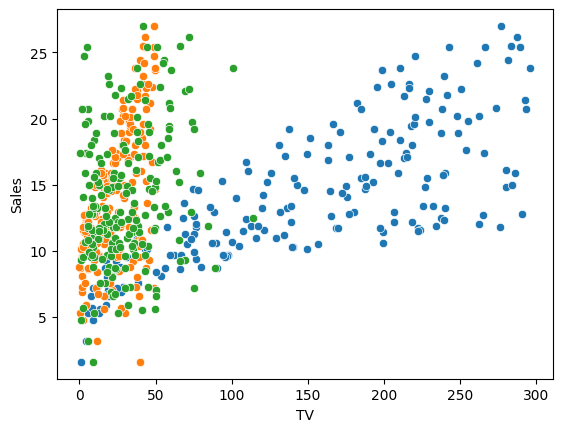

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='TV', 
                y='Sales', data=df)
sns.scatterplot(x='Radio', 
                y='Sales', data=df)
sns.scatterplot(x='Newspaper', 
                y='Sales', data=df)

Now, we can format the data and run the model with Sklearn. Notice that with Sklearn we can simply use the data-frame as a base to input the data in the model.

In [35]:
from sklearn.linear_model import LinearRegression
import time

# First we create the input and output matrix and vector
X = df.drop('Sales', axis=1)
Y = df['Sales']

# Now we split the data into training and test data sets. We set a test size of 30%
# Notice that we can use sklearn train_test_split function to randomly split the data
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

# Now we fit the model (find the optimised parameters) using the training set
time_ini_sklearn = time.time()
mult_reg = LinearRegression()
mult_reg.fit(X_train, y_train)
time_end_sklearn = time.time()

# And we predict the values using the optimised parameters found
y_hat_test = mult_reg.predict(X_test)
y_hat_train = mult_reg.predict(X_train)

# Finally, we evaluate the error with the r2_score for the training and test sets:
from sklearn.metrics import r2_score

score_test = r2_score(y_test, y_hat_test)
print(f"The accuracy of the model on test set is {score_test*100:.2f}%")

score_test = r2_score(y_train, y_hat_train)
print(f"The accuracy of the model on train set is {score_test*100:.2f}%")


The accuracy of the model on test set is 91.51%
The accuracy of the model on train set is 88.65%
